<a href="https://colab.research.google.com/github/Ashik9576/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Importing Libraries**

In [1]:
!pip install keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler

from time import time
import keras.backend as K
from tensorflow.python.keras.layers import Layer, InputSpec
#from tensorflow.keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input, Embedding
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading DataSet**

In [3]:
# creating directory path
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df_netflix=df.copy()

# **File Structure and content Information**

In [4]:
#top 10 rows of the dataset
df.head()

show_id  ...                                        description
0      s1  ...  In a future where the elite inhabit an island ...
1      s2  ...  After a devastating earthquake hits Mexico Cit...
2      s3  ...  When an army recruit is found dead, his fellow...
3      s4  ...  In a postapocalyptic world, rag-doll robots hi...
4      s5  ...  A brilliant group of students become card-coun...

[5 rows x 12 columns]

In [5]:
#shape of the dataset
shape=df.shape
print("Rows :"+str(shape[0]) +", Columns :"+str(shape[1]))

Rows :7787, Columns :12


In [6]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **Missing Value Treatment**
Knowing about missing values is important because they indicate how much we dont's know about our data. Making inferences based on just a few cases is often unwise. In addition, many modelling procedures break down when missing values are involved and the corresponding rows will either have to be removed completely or the values need to be estimated somehow.

In [7]:
#check null values in Data frame
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# **Describing dataset**

In [8]:
# describing the dataset
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [9]:
#Check count of unique id's in the dataset
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

# **Reformatting Features**

# **UNIVARIATE ANALYSIS**

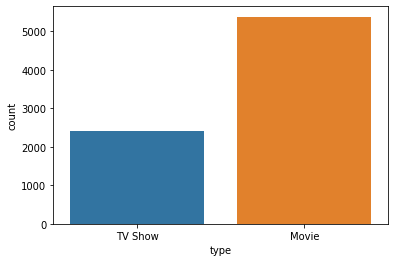

In [10]:
sns.countplot(x='type',data=df)

In [11]:
from collections import Counter

#Define displayed years:
years = list(range(2008,2020,1))

#separate movies and tv_shows:
movie_rows = df_netflix.loc[df_netflix["type"] == "Movie"]
tv_rows = df_netflix.loc[df_netflix["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

# Calculate percentages of movies and tv shows:
movies_per = round(movie_rows.shape[0] / df_netflix["type"].shape[0] * 100, 2)
tvshows_per = round(tv_rows.shape[0] / df_netflix["type"].shape[0] * 100, 2)

#Top Movie and TV Show producer country:
top5_producer_countrys = df_netflix.country.value_counts().sort_values(ascending=False).head(5)

#Top most commen Actors an directors (Movies and tv shows):
casts = ", ".join(df_netflix.copy().fillna("")['cast']).split(", ")
counter_list = Counter(casts).most_common(5)
most_commen_actors = [i for i in counter_list if i[0] != ""]
labels = [i[0] for i in most_commen_actors][::-1]
values = [i[1] for i in most_commen_actors][::-1]

most_commen_directors = df_netflix.director.value_counts().head(5).sort_values(ascending=True)

No handles with labels found to put in legend.


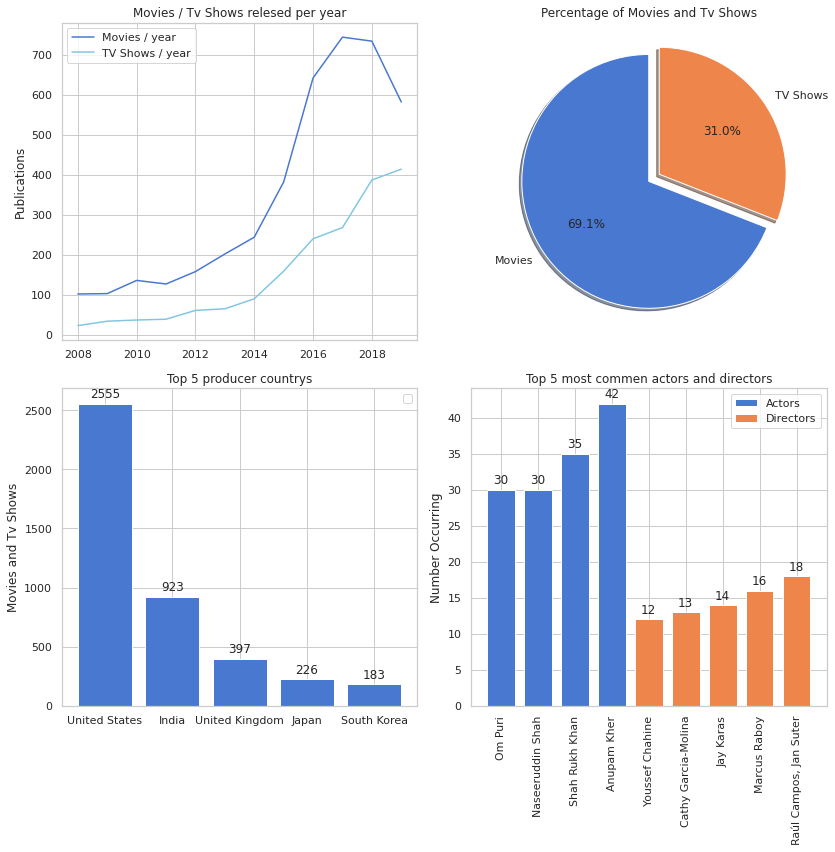

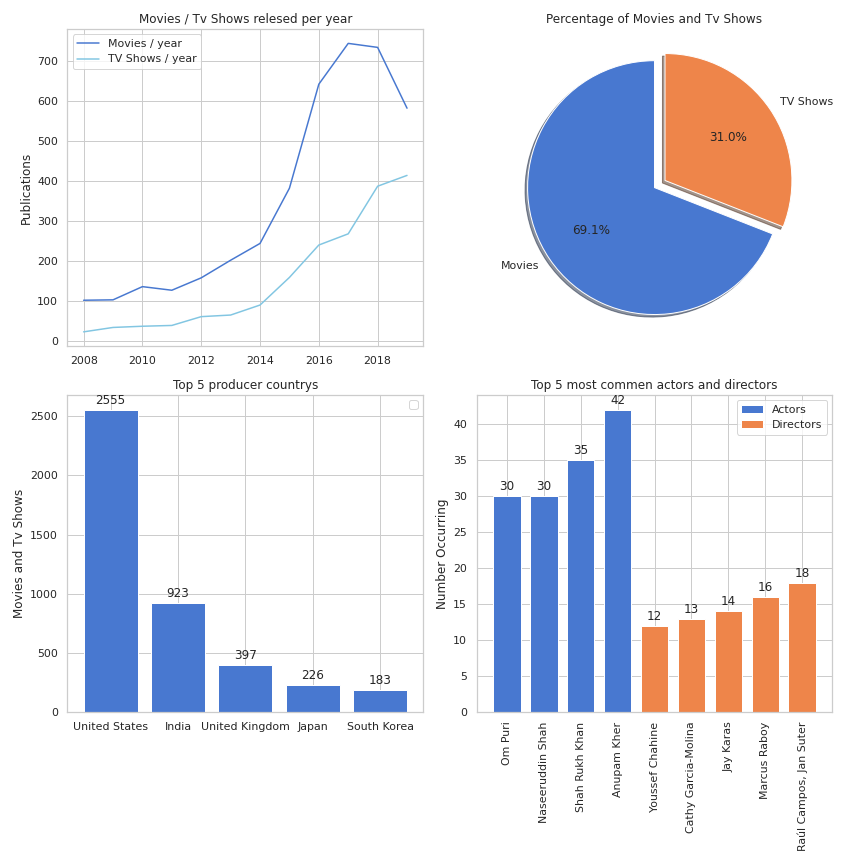

In [12]:
width = 0.75

sns.set(style="whitegrid", palette="muted", color_codes=True)

def autolabel(rects, axes):
    """Helper function to attach a text label above each bar in *rects*, displaying its height.
        Add specific axes[x, y] for subplot labeling"""
    for rect in rects:
        height = rect.get_height()
        axes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False)

#Line plot of Movies and TV Shows released by Netflix per year")
sns.lineplot(data=movies, color="b", ax=axes[0, 0], label="Movies / year")
sns.lineplot(data=tv_shows, color="c", ax=axes[0, 0], label="TV Shows / year")

# Pie chart of type percentages
axes[0, 1].pie([movies_per, tvshows_per], explode=(0, 0.1,), labels=["Movies", "TV Shows"], autopct='%1.1f%%',
        shadow=True, startangle=90)

# Bar chart of top 5 Movie / Tv shows producer countrys:
rects1 = axes[1, 0].bar(top5_producer_countrys.index, top5_producer_countrys.values,)

autolabel(rects1, axes[1, 0])

#Bar chart of top 5 most commen actors and directors:
rects2 = axes[1, 1].bar(labels, values, width, label='Actors',)

rects3 = axes[1, 1].bar(most_commen_directors.index, most_commen_directors.values, width, label='Directors')

autolabel(rects2, axes[1, 1])
autolabel(rects3, axes[1, 1])

axes[0, 0].set_ylabel('Publications')
axes[0, 0].set_title('Movies / Tv Shows relesed per year')

axes[0, 1].set_title('Percentage of Movies and Tv Shows')

axes[1, 0].set_ylabel('Movies and Tv Shows')
axes[1, 0].set_title('Top 5 producer countrys')
axes[1, 0].legend()

axes[1, 1].set_ylabel('Number Occurring')
axes[1, 1].set_xticklabels(labels + list(most_commen_directors.index), rotation="vertical")
axes[1, 1].set_title('Top 5 most commen actors and directors')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('output.png')
plt.show()

from IPython.display import Image
Image(filename='output.png')

In [13]:
m_s_groups = df_netflix.groupby(["title", "director", "listed_in",]).apply(lambda df: df.title) #Returns Pandas Series with movie / series title and original index
m_s_groups.head()

title                          director                     listed_in                                         
#Alive                         Cho Il                       Horror Movies, International Movies, Thrillers  27                           #Alive
#AnneFrank - Parallel Stories  Sabina Fedeli, Anna Migotto  Documentaries, International Movies             28    #AnneFrank - Parallel Stories
#FriendButMarried              Rako Prijanto                Dramas, International Movies, Romantic Movies   31                #FriendButMarried
#FriendButMarried 2            Rako Prijanto                Dramas, International Movies, Romantic Movies   32              #FriendButMarried 2
#Roxy                          Michael Kennedy              Comedies, Romantic Movies                       34                            #Roxy
Name: title, dtype: object

In [14]:
df_token = df_netflix[ "description"]
#df_token = df_netflix[["listed_in", "description"]].values.tolist()

maxlen = 1500 #only use this number of most frequent words
training_samples = 800
validation_samples = 450
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_token) # generates word index
sequences = tokenizer.texts_to_sequences(df_token) # transforms strings in list of intergers
word_index = tokenizer.word_index # calculated word index
print(f"{len(word_index)} unique tokens found")

data = pad_sequences(sequences, maxlen=maxlen) #transforms integer lists into 2D tensor

19081 unique tokens found


In [15]:
scaler = MinMaxScaler() 
x = scaler.fit_transform(data) # the values of all features are rescaled into the range of [0, 1]

In [16]:
def autoencoder(dims, act='relu', init='glorot_uniform'):
    """
    Fully connected symmetric auto-encoder model.
  
    dims: list of the sizes of layers of encoder like [500, 500, 2000, 10]. 
          dims[0] is input dim, dims[-1] is size of the latent hidden layer.

    act: activation function
    
    return:
        (autoencoder_model, encoder_model): Model of autoencoder and model of encoder
    """
    n_stacks = len(dims) - 1
    
    input_data = Input(shape=(dims[0],), name='input')
    x = input_data
    
    # internal layers of encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # latent hidden layer
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)

    x = encoded
    # internal layers of decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # decoder output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    
    decoded = x
    
    autoencoder_model = Model(inputs=input_data, outputs=decoded, name='autoencoder')
    encoder_model     = Model(inputs=input_data, outputs=encoded, name='encoder')
    
    return autoencoder_model, encoder_model

In [17]:
n_clusters = 20 # max numbers of clusters
n_epochs   = 8 # epchos for autencoder training
batch_size = 128

In [18]:
dims = [x.shape[-1], 500, 500, 1000, 10] 
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                           distribution='uniform')
pretrain_optimizer = "rmsprop" #SGD(lr=1, momentum=0.9)
pretrain_epochs = n_epochs
batch_size = batch_size

In [19]:
dims

[1500, 500, 500, 1000, 10]

In [20]:
class ClusteringLayer(Layer):
    '''
    Clustering layer converts input sample (feature) to soft label, i.e. a vector that represents the probability of the
    sample belonging to each cluster. The probability is calculated with student's t-distribution.
    '''

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(name='clusters', shape=(self.n_clusters, input_dim), initializer='glorot_uniform') 
        
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        ''' 
        student t-distribution, as used in t-SNE algorithm.
        It measures the similarity between embedded point z_i and centroid µ_j.
                 q_ij = 1/(1+dist(x_i, µ_j)^2), then normalize it.
                 q_ij can be interpreted as the probability of assigning sample i to cluster j.
                 (i.e., a soft assignment)
       
        inputs: the variable containing data, shape=(n_samples, n_features)
        
        Return: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
        '''
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure all of the values of each sample sum up to 1.
        
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [21]:
autoencoder, encoder = autoencoder(dims, init=init)

In [22]:
autoencoder.compile(optimizer=pretrain_optimizer, loss='binary_crossentropy')  #loss='mse'
autoencoder.fit(x, x, batch_size=batch_size, epochs=pretrain_epochs)
#autoencoder.save_weights(save_dir + '/ae_weights.h5')

Epoch 1/8
61/61 [==============================] - 17s 215ms/step - loss: 0.0097
Epoch 2/8
61/61 [==============================] - 14s 232ms/step - loss: 0.0090
Epoch 3/8
61/61 [==============================] - 14s 225ms/step - loss: 0.0090
Epoch 4/8
61/61 [==============================] - 14s 222ms/step - loss: 0.0089
Epoch 5/8
61/61 [==============================] - 13s 221ms/step - loss: 0.0089
Epoch 6/8
61/61 [==============================] - 13s 209ms/step - loss: 0.0079
Epoch 7/8
61/61 [==============================] - 10s 170ms/step - loss: 0.0071
Epoch 8/8
61/61 [==============================] - 9s 149ms/step - loss: 0.0062


In [23]:
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)

In [24]:
model.compile(optimizer=SGD(0.01, 0.9), loss='kld') #(optimizer=SGD(0.01, 0.9), loss='kld')

In [25]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x))

In [26]:
y_pred_last = np.copy(y_pred)

In [28]:
#model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

In [29]:
# computing an auxiliary target distribution
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

In [30]:
loss = 0
index = 0
maxiter = 1000 # 8000
update_interval = 100 # 140
index_array = np.arange(x.shape[0])

In [31]:
tol = 0.001 # tolerance threshold to stop training

In [32]:
for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q = model.predict(x, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p

    idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]
    loss = model.train_on_batch(x=x[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0

#model.save_weights(save_dir + '/DEC_model_final.h5')

In [33]:
# Eval.
q = model.predict(x, verbose=0)
p = target_distribution(q)  # update the auxiliary target distribution p

# evaluate the clustering performance
y_pred = q.argmax(1)

In [34]:
data_all = df_netflix.copy()

In [35]:
data_all['cluster'] = y_pred
data_all.head()

show_id     type  ...                                        description cluster
0      s1  TV Show  ...  In a future where the elite inhabit an island ...       3
1      s2    Movie  ...  After a devastating earthquake hits Mexico Cit...       4
2      s3    Movie  ...  When an army recruit is found dead, his fellow...      17
3      s4    Movie  ...  In a postapocalyptic world, rag-doll robots hi...       8
4      s5    Movie  ...  A brilliant group of students become card-coun...       3

[5 rows x 13 columns]

In [36]:
data_all['cluster'].value_counts()

3     3337
17    2859
4      679
8      417
1      278
11     117
12      66
16      34
Name: cluster, dtype: int64

In [37]:
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(x)

x_embedded.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(7787, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


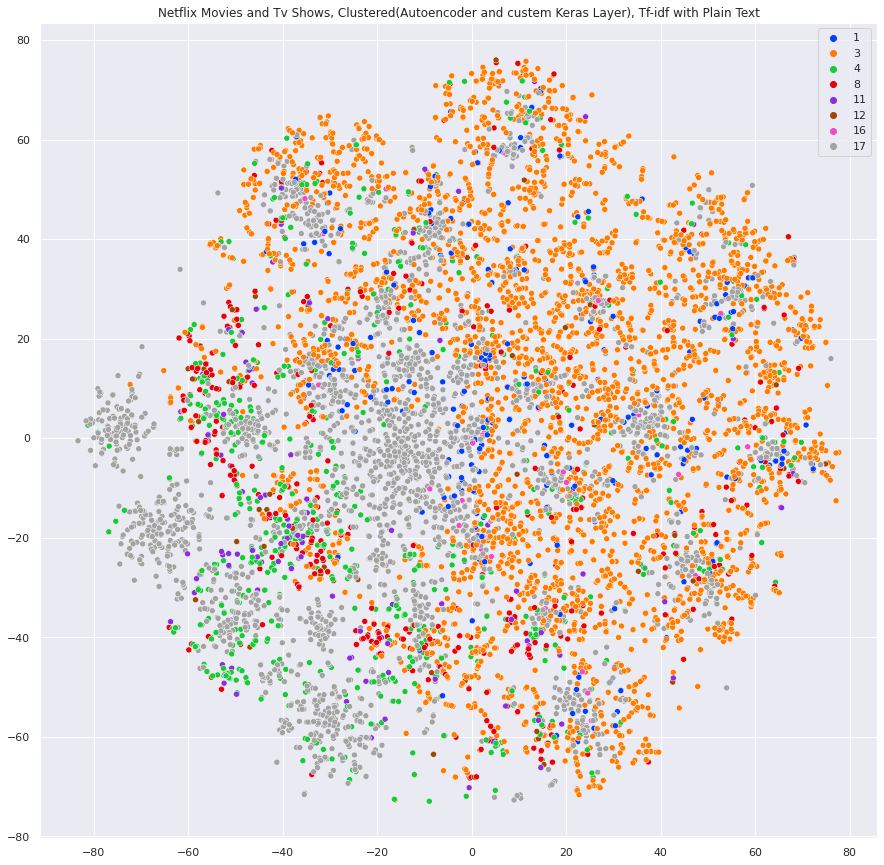

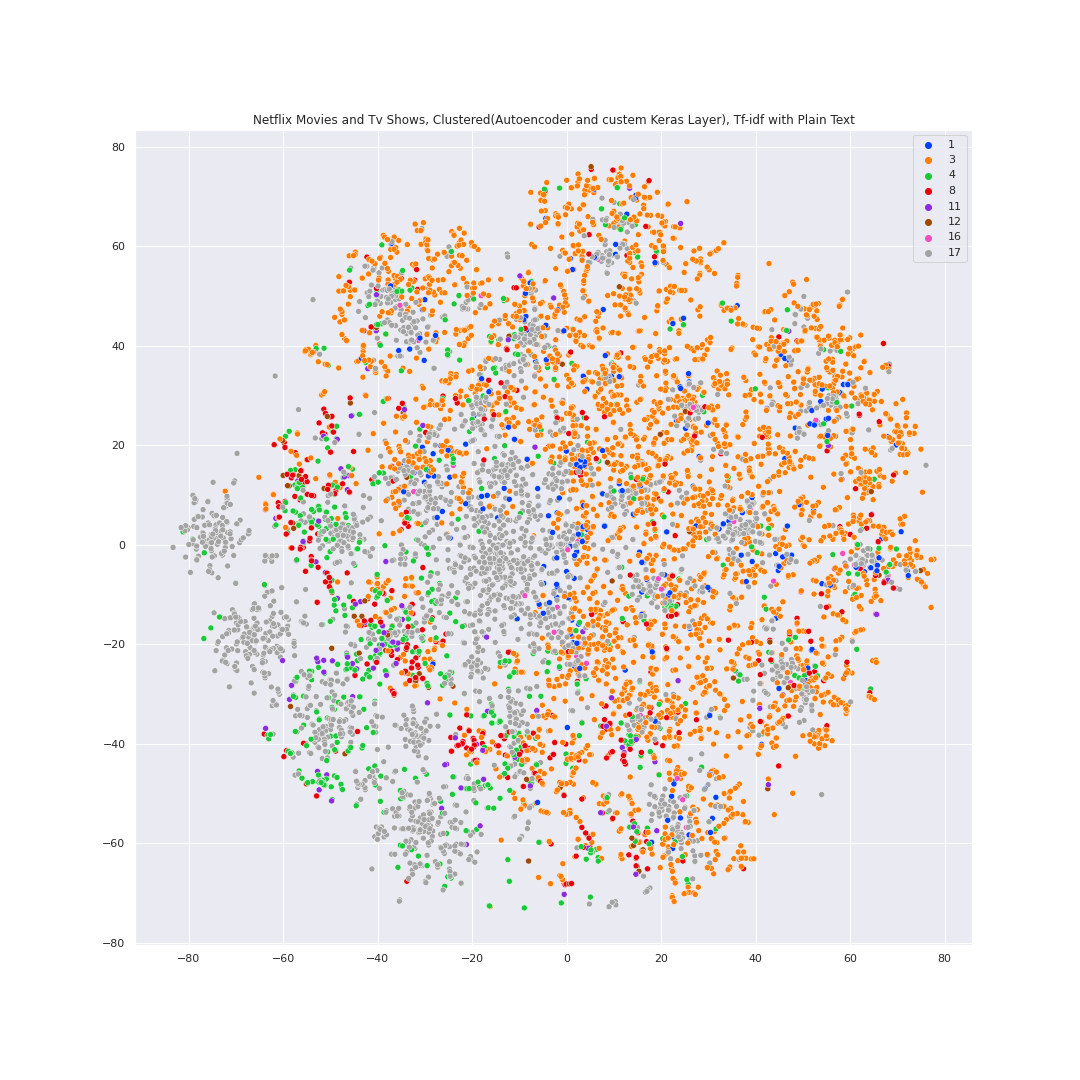

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", len(set(y_pred)))

# plot
sns.scatterplot(x_embedded[:,0], x_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("Netflix Movies and Tv Shows, Clustered(Autoencoder and custem Keras Layer), Tf-idf with Plain Text")
plt.savefig('output2.png')
plt.show()


from IPython.display import Image
Image(filename='output2.png')

In [39]:
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap
from bokeh.io import output_file, show
from bokeh.transform import transform
from bokeh.io import output_notebook
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import RadioButtonGroup
from bokeh.models import TextInput
from bokeh.layouts import gridplot
from bokeh.models import Div
from bokeh.models import Paragraph
from bokeh.layouts import column, widgetbox

output_notebook()
y_labels = y_pred

# data sources
source = ColumnDataSource(data=dict(
    x= x_embedded[:,0], 
    y= x_embedded[:,1],
    x_backup = x_embedded[:,0],
    y_backup = x_embedded[:,1],
    desc= y_labels, 
    titles= df_netflix['title'],
    directors = df_netflix['director'],
    cast = df_netflix['cast'],
    description = df_netflix['description'],
    labels = ["C-" + str(x) for x in y_labels]
    ))

# hover over information
hover = HoverTool(tooltips=[
    ("Title", "@titles"),
    ("Director(s)", "@directors"),
    ("Cast", "@cast"),
    ("Description", "@description"),
],
                 point_policy="follow_mouse")

# map colors
mapper = linear_cmap(field_name='desc', 
                     palette=Category20[20],
                     low=min(y_labels) ,high=max(y_labels))

# prepare the figure
p = figure(plot_width=800, plot_height=800, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset'], 
           title="Netflix Movies and Tv Shows, Clustered(Autoencoder and custem Keras Layer), Tf-idf with Plain Text", 
           toolbar_location="right")

# plot
p.scatter('x', 'y', size=5, 
          source=source,
          fill_color=mapper,
          line_alpha=0.3,
          line_color="black",
          legend = 'labels')

# option
option = RadioButtonGroup(labels=["C-0", "C-1", "C-2",
                                  "C-3", "C-4", "C-5",
                                  "C-6", "C-7", "C-8",
                                  "C-9", "C-10", "C-11",
                                  "C-12", "C-13", "C-14",
                                  "C-15", "C-16", "C-17",
                                  "C-18", "C-19", "All"], 
                          active=20)

# search box
#keyword = TextInput(title="Search:", callback=keyword_callback)
#header
header = Div(text="""<h1>Find similar movies / tv shows in corresponding Cluster</h1>""")

# show
show(column(header,p))
